In [44]:
import numpy as np
import matplotlib.pyplot as plt
from eigenwell.src.eigen_guide import *
from eigenwell.src.constants import *
import os
L0 = 1e-6;
omega_p = 0.72*np.pi*1e15;
gamma = 5.5e12;

In [37]:
!pwd
!ls ../

/Users/nathanzhao/src/eigenwell/notebooks
LICENSE            eigenwell.egg-info notebooks          src
README.md          examples           requirements.txt   test
dist               img                setup.py


In [29]:
omega_cutoff = 0.83020*omega_p;
wvlen_cutoff = 2*np.pi*C0/omega_cutoff/1e-6;
wvlen_cutoff2 = 2*np.pi*C0/(0.92*omega_p)/1e-6;
lambda_p = 2*np.pi*C0/omega_p/1e-6;

print(wvlen_cutoff, lambda_p, omega_p)

wvlen_scan = np.linspace(0.7,20, 3000);
epsilon_diel = 16;

a = 0.2*L0; #lattice constant
Nx = 500
eps_r = epsilon_diel*np.ones((Nx, 1))
eps_r = eps_r.astype('complex')
print(eps_r.shape)
fill_factor = 0.2;
dx= a/Nx;

dL = [dx, 1];
N = [Nx, 1];
print(dL)

fd = FiniteDifference(dL,N)

1.0030904122608217 0.8327656602589342 2261946710584651.0
(500, 1)
[3.9999999999999996e-10, 1]


In [30]:
eigen = EigenGuideK2D(eps_r, fd, polarization = 'TM');


In [31]:
kspectra = list();
for i,wvlen in enumerate(wvlen_scan):
    omega = 2*np.pi*C0/wvlen/L0;
    epsilon_metal = 1-omega_p**2/(omega**2 - 1j*(gamma*omega))
    eps_r[int(Nx/2-fill_factor*Nx/2): int(Nx/2+fill_factor*Nx/2)] = epsilon_metal;
    eigen.update_structure(eps_r);
    
    neff = np.sqrt(np.max(np.real(eps_r)));
    beta_est = abs(2*np.pi*neff / (wvlen*L0));
    sigma = beta_est**2;
    
    kvals, modes = eigen.eigensolve(omega, sigma = sigma, num_modes = 10);
    
    kspectra.append(np.sqrt(kvals));

kspectra = np.array(kspectra);

omega_scan = 2*np.pi*C0/wvlen_scan/1e-6


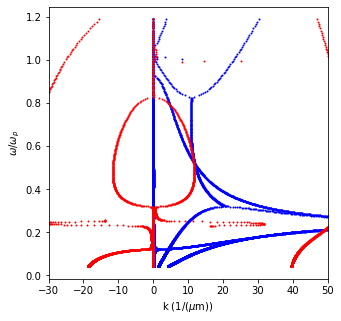

['IMI_band_structure.png']


In [49]:
plt.figure(figsize = (5,5));
plt.plot(np.real(kspectra)*1e-6, omega_scan/omega_p, '.b', markersize = 2);
plt.plot(np.imag(kspectra)*1e-6, omega_scan/omega_p, '.r', markersize = 2);
plt.xlim((-30, 50))
plt.xlabel('k (1/($\mu$m))')
plt.ylabel('$\omega/\omega_p$')
plt.savefig("../img/IMI_band_structure.png",dpi = 300)
plt.show();
#plt.plot(np.imag(kspectra), omega_scan/omega_p, '.r', markersize = 2);
print(os.listdir("../img"))

## eigenTE

In [22]:
eigen_te = EigenGuideK2D(eps_r, fd, polarization = 'TE');


In [23]:
kspectra_te = list();
for i,wvlen in enumerate(wvlen_scan):
    omega = 2*np.pi*C0/wvlen/L0;
    epsilon_metal = 1-omega_p**2/(omega**2 - 1j*(gamma*omega))
    eps_r[int(Nx/2-fill_factor*Nx/2): int(Nx/2+fill_factor*Nx/2)] = epsilon_metal;
    eigen.update_structure(eps_r);
    
    neff = np.sqrt(np.max(np.real(eps_r)));
    beta_est = abs(2*np.pi*neff / (wvlen*L0));
    sigma = beta_est**2;
    
    kvals, modes = eigen_te.eigensolve(omega, sigma = sigma, num_modes = 10);
    
    kspectra_te.append(np.sqrt(kvals));

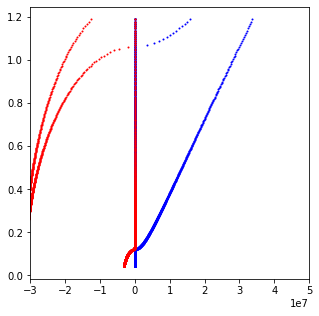

In [24]:
plt.figure(figsize = (5,5));
plt.plot(np.real(kspectra), omega_scan/omega_p, '.b', markersize = 2);
plt.plot(np.imag(kspectra), omega_scan/omega_p, '.r', markersize = 2);
plt.xlim((-30e6, 50e6))
plt.show();
